In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(font_scale=1.4)

In [3]:
df = pd.read_csv("../../supplementary_data/colour_separated.csv")

/tmp/ipykernel_115532/239705545.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accuracy_by_x = df.groupby("x_bin")["Is correct"].mean() * 100


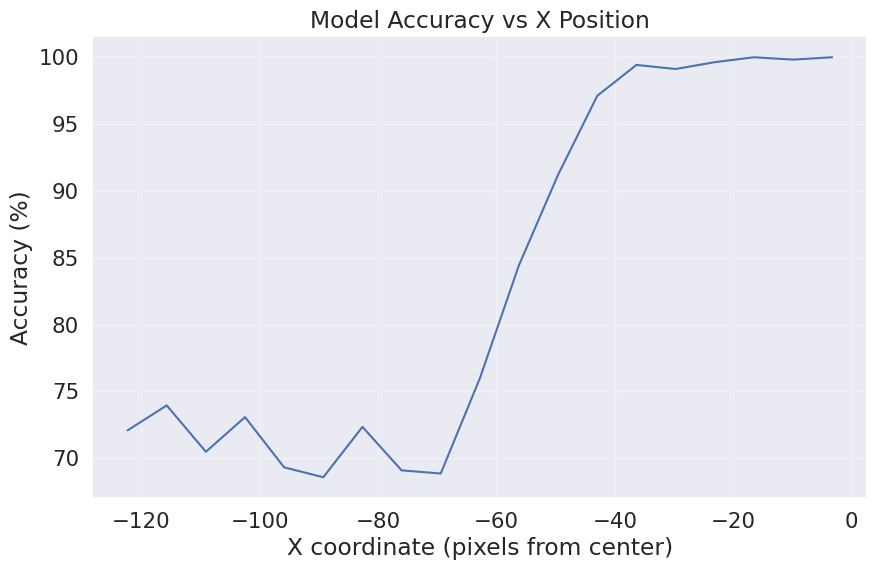

In [4]:

# Extract coordinates from the image paths
def extract_coords(path):
    # Get the filename from the path
    filename = path.split("/")[-1]
    # Split by underscore and get the relevant numbers
    parts = filename.split("_")
    dist = float(parts[2])
    angle = float(parts[3])
    # Convert to radians
    angle_rad = np.deg2rad(angle)
    # Calculate x coordinate
    x = dist * np.cos(angle_rad)
    return x


# Process the dataframe
x_coords = df["Image"].apply(extract_coords)

# Create bins for the x coordinates
bins = np.linspace(x_coords.min(), x_coords.max(), 20)
df["x_bin"] = pd.cut(x_coords, bins)

# Calculate accuracy for each bin
accuracy_by_x = df.groupby("x_bin")["Is correct"].mean() * 100

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    x=[(b.left + b.right) / 2 for b in accuracy_by_x.index], y=accuracy_by_x.values
)
plt.xlabel("X coordinate (pixels from center)")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy vs X Position")
plt.grid(True, alpha=0.3)
plt.show()